In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch 
import numpy as np



In [2]:
df = pd.read_csv('D:/Dataset/anggapurnama/twitter-dataset-ppkm/versions/2/INA_TweetsPPKM_Labeled_Pure.csv',
    sep= None,
    engine= 'python')

In [3]:
df['sentiment'].unique()

array([1, 2, 0], dtype=int64)

In [4]:
df

,Date,User,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,2022-03-31 09:26:00+00:00,inewsdotid,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,2022-03-31 05:02:34+00:00,vdvc_talk,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,2022-03-30 14:23:10+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,2022-03-30 11:28:57+00:00,tvOneNews,Kementerian Agama menerbitkan Surat Edaran Nom...,1
...,...,...,...,...
23639,2020-06-26 18:34:56+00:00,bananabluff,noelle loses a bet to akarsha and it somehow e...,1
23640,2020-06-19 15:14:07+00:00,Auqroix,they call her... weekeeshee...\n#butterflysoup...,1
23641,2020-06-18 23:45:26+00:00,Auqroix,"put out what you wanna see more of, amirite ga...",1
23642,2020-06-15 23:17:22+00:00,Auqroix,"i don't need anybody, i'm fine here on my own\...",1


In [5]:
df['Tweet'].duplicated().sum()

158

In [6]:
df = df.drop_duplicates(subset= 'Tweet')

In [7]:
df.duplicated().sum()

0

In [8]:
df['Tweet']

0        Ketahui informasi pembagian #PPKM di wilayah J...
1        Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...
2        Juru bicara Satgas Covid-19, Wiku Adisasmito m...
3        Ketahui informasi pembagian #PPKM di wilayah J...
4        Kementerian Agama menerbitkan Surat Edaran Nom...
                               ...                        
23639    noelle loses a bet to akarsha and it somehow e...
23640    they call her... weekeeshee...\n#butterflysoup...
23641    put out what you wanna see more of, amirite ga...
23642    i don't need anybody, i'm fine here on my own\...
23643    Selamat Siang sahabat online, nih aku sedikit ...
Name: Tweet, Length: 23486, dtype: object

In [9]:
df['Tweet'].duplicated().sum()

0

In [10]:
df.isna().sum()

Date         0
User         0
Tweet        0
sentiment    0
dtype: int64

In [11]:
df.isnull().sum()

Date         0
User         0
Tweet        0
sentiment    0
dtype: int64

In [12]:
df['sentiment'].value_counts()

sentiment
1    17598
2     3945
0     1943
Name: count, dtype: int64

(array([ 1943.,     0., 17598.,     0.,  3945.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

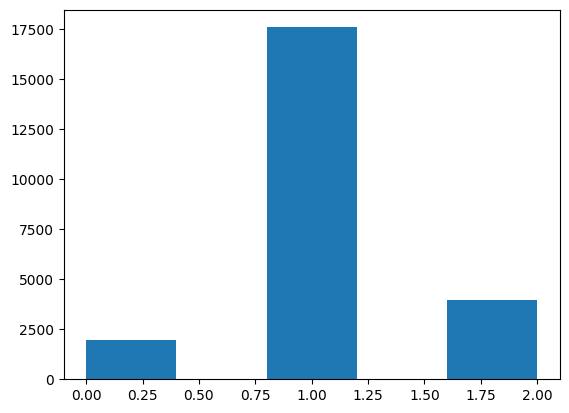

In [13]:
plt.hist(df['sentiment'], bins= 5)

In [14]:
df = df.drop('User', axis= 1)

In [15]:
df

,Date,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,2022-03-31 09:26:00+00:00,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,2022-03-31 05:02:34+00:00,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,2022-03-30 14:23:10+00:00,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,2022-03-30 11:28:57+00:00,Kementerian Agama menerbitkan Surat Edaran Nom...,1
...,...,...,...
23639,2020-06-26 18:34:56+00:00,noelle loses a bet to akarsha and it somehow e...,1
23640,2020-06-19 15:14:07+00:00,they call her... weekeeshee...\n#butterflysoup...,1
23641,2020-06-18 23:45:26+00:00,"put out what you wanna see more of, amirite ga...",1
23642,2020-06-15 23:17:22+00:00,"i don't need anybody, i'm fine here on my own\...",1


In [16]:
df['Date'] = pd.to_datetime(df['Date'], utc = True)

In [17]:
kamus_slang = {
    "gk" : "tidak",
    "ga" : "tidak",
    "nggak" : "tidak",
    "yg" : "yang",
    "aku" : "saya",
    "gua" : "saya",
    "gue" : "saya",
    "gw" : "saya",
    "jan" : "jangan",
    "jgn" : "jangan",
    "bgt" : "sangat",
    "bet" :"sangat",
    "banget" : "sangat",
    "lu" : "kamu",
    "lo" : "kamu",
    "pls" : "tolong",
    "mantul" : "mantap",
    "guys" : "teman",
    "gak" : "tidak",
    "aje" : "saja",
    "aja" : "saja",
    "aj" : "aja",
    "sy" : "aku",
    "belom" : "belum",
    "blm" : "belum",
    "bae" : "baik",
    "tolol" : "bodoh",
    "anjing" : "bodoh",
    "gblk" : "bodoh",
    "goblok" : "bodoh",
    "bobo" : "tidur",
    "bobok" : "tidur",
    "capek" : "lelah",
    "cpk" : "lelah",
    "cape" : "lelah",
    "gitu" : "begitu",
    "gini" : "begini",
    "cpt" : "cepat",
    "cepet" : "cepat",
    "ngeh" : "mengerti",
    "planga plongo" : "bingung",
    "diem" : "diam",
    "dengerin" : "dengarkan",
    "loh" : "lah",
    "denger" : "dengar",
    "knp" : "kenapa",
    "napa" : "kenapa",
    "sape" : "siapa",
    
    
}

In [18]:
tweet_lower = df['Tweet'].str.lower()
tweet_lower

0        ketahui informasi pembagian #ppkm di wilayah j...
1        tempat ibadah di wilayah ppkm level 1 boleh be...
2        juru bicara satgas covid-19, wiku adisasmito m...
3        ketahui informasi pembagian #ppkm di wilayah j...
4        kementerian agama menerbitkan surat edaran nom...
                               ...                        
23639    noelle loses a bet to akarsha and it somehow e...
23640    they call her... weekeeshee...\n#butterflysoup...
23641    put out what you wanna see more of, amirite ga...
23642    i don't need anybody, i'm fine here on my own\...
23643    selamat siang sahabat online, nih aku sedikit ...
Name: Tweet, Length: 23486, dtype: object

In [19]:
df['Tweet'] = tweet_lower

In [20]:
df

,Date,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,ketahui informasi pembagian #ppkm di wilayah j...,1
1,2022-03-31 09:26:00+00:00,tempat ibadah di wilayah ppkm level 1 boleh be...,1
2,2022-03-31 05:02:34+00:00,"juru bicara satgas covid-19, wiku adisasmito m...",1
3,2022-03-30 14:23:10+00:00,ketahui informasi pembagian #ppkm di wilayah j...,1
4,2022-03-30 11:28:57+00:00,kementerian agama menerbitkan surat edaran nom...,1
...,...,...,...
23639,2020-06-26 18:34:56+00:00,noelle loses a bet to akarsha and it somehow e...,1
23640,2020-06-19 15:14:07+00:00,they call her... weekeeshee...\n#butterflysoup...,1
23641,2020-06-18 23:45:26+00:00,"put out what you wanna see more of, amirite ga...",1
23642,2020-06-15 23:17:22+00:00,"i don't need anybody, i'm fine here on my own\...",1


In [21]:
import re

In [22]:
df['Tweet'] = df['Tweet'].str.split(r'[\s,.:;!?#/@]+')

In [23]:
df

,Date,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,"[ketahui, informasi, pembagian, ppkm, di, wila...",1
1,2022-03-31 09:26:00+00:00,"[tempat, ibadah, di, wilayah, ppkm, level, 1, ...",1
2,2022-03-31 05:02:34+00:00,"[juru, bicara, satgas, covid-19, wiku, adisasm...",1
3,2022-03-30 14:23:10+00:00,"[ketahui, informasi, pembagian, ppkm, di, wila...",1
4,2022-03-30 11:28:57+00:00,"[kementerian, agama, menerbitkan, surat, edara...",1
...,...,...,...
23639,2020-06-26 18:34:56+00:00,"[noelle, loses, a, bet, to, akarsha, and, it, ...",1
23640,2020-06-19 15:14:07+00:00,"[they, call, her, weekeeshee, butterflysoup, p...",1
23641,2020-06-18 23:45:26+00:00,"[put, out, what, you, wanna, see, more, of, am...",1
23642,2020-06-15 23:17:22+00:00,"[i, don't, need, anybody, i'm, fine, here, on,...",1


In [24]:
from word2word import Word2word

# Translator EN → ID
en2id = Word2word("en", "id")

# Cache biar translasi ga ngulang-ulang
cache = {}

def translate_if_english(word):
    w = word.lower()
    if w in cache:
        return cache[w]

    try:
        trans = en2id(w)
        if trans:  
            cache[w] = trans[0]   # simpan hasil translasi
            return trans[0]
    except:
        pass

    cache[w] = word   # kalau ga bisa ditranslate (anggap bukan English)
    return word

# Ubah langsung di dataset kamu
df["Tweet"] = df["Tweet"].apply(
    lambda tokens: [translate_if_english(tok) for tok in tokens]
)


In [25]:
def replace_slang_tokens(tokens, slang_dict):
    return [kamus_slang.get(token, token) for token in tokens]
df['Tweet'] = df['Tweet'].apply(lambda tokens : replace_slang_tokens(tokens, kamus_slang))

In [26]:
df['Tweet'] = df['Tweet'].apply(lambda tokens: [t for t in tokens if t.strip() != ''])


In [27]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [28]:
df['Tweet_str'] = df['Tweet'].apply(lambda tokens: ' '.join(tokens))


In [29]:
df['Tweet']

0        [ketahui, informasi, pembagian, ppkm, Da, wila...
1        [tempat, ibadah, Da, wilayah, ppkm, tingkat, 1...
2        [juru, bicara, satgas, covid-19, wiku, adisasm...
3        [ketahui, informasi, pembagian, ppkm, Da, wila...
4        [kementerian, kedelei, menerbitkan, surat, eda...
                               ...                        
23639    [noelle, kalah, wanita, bertaruh, kepada, akar...
23640    [menemukan, menyebutnya, membawanya, weekeeshe...
23641    [meletakkannya, out, itulah, denganmu, wanna, ...
23642    [i, don't, membutuhkanmu, siapa-siapa, i'm, fi...
23643    [selamat, siang, sahabat, online, oportunis, s...
Name: Tweet, Length: 23486, dtype: object

In [30]:
df

,Date,Tweet,sentiment,Tweet_str
0,2022-03-31 14:32:04+00:00,"[ketahui, informasi, pembagian, ppkm, Da, wila...",1,ketahui informasi pembagian ppkm Da wilayah ja...
1,2022-03-31 09:26:00+00:00,"[tempat, ibadah, Da, wilayah, ppkm, tingkat, 1...",1,tempat ibadah Da wilayah ppkm tingkat 1 boleh ...
2,2022-03-31 05:02:34+00:00,"[juru, bicara, satgas, covid-19, wiku, adisasm...",1,juru bicara satgas covid-19 wiku adisasmito me...
3,2022-03-30 14:23:10+00:00,"[ketahui, informasi, pembagian, ppkm, Da, wila...",1,ketahui informasi pembagian ppkm Da wilayah ja...
4,2022-03-30 11:28:57+00:00,"[kementerian, kedelei, menerbitkan, surat, eda...",1,kementerian kedelei menerbitkan surat edaran n...
...,...,...,...,...
23639,2020-06-26 18:34:56+00:00,"[noelle, kalah, wanita, bertaruh, kepada, akar...",1,noelle kalah wanita bertaruh kepada akarsha ke...
23640,2020-06-19 15:14:07+00:00,"[menemukan, menyebutnya, membawanya, weekeeshe...",1,menemukan menyebutnya membawanya weekeeshee bu...
23641,2020-06-18 23:45:26+00:00,"[meletakkannya, out, itulah, denganmu, wanna, ...",1,meletakkannya out itulah denganmu wanna jumpa ...
23642,2020-06-15 23:17:22+00:00,"[i, don't, membutuhkanmu, siapa-siapa, i'm, fi...",1,i don't membutuhkanmu siapa-siapa i'm fine Kem...


In [31]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [32]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
from collections import Counter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# 1. Ambil list token dari df
tokens_lists = df['Tweet'].tolist()

# 2. Hitung frekuensi token
freq = Counter(t for tokens in tokens_lists for t in tokens)
print("Total unique tokens:", len(freq))

# 3. Ambil yg sering digunakan teratas
top_tokens = [w for w, _ in freq.most_common(10000)]
print("Selected top tokens:", len(top_tokens))

# 4. Buat stemmer
stemmer = StemmerFactory().create_stemmer()

# 5. Stem dengan progress print tiap 10 kata
stem_map = {}
for i, w in enumerate(top_tokens, start=1):
    stem_map[w] = stemmer.stem(w)
    if i % 10 == 0:  # print setiap 10 kata
        print(f"[{i}/{len(top_tokens)}] {w} -> {stem_map[w]}")

# 6. Rekonstruksi tweet
def reconstruct(tokens):
    return " ".join(stem_map.get(t, t) for t in tokens)

df['lemma_str'] = [reconstruct(tokens) for tokens in tokens_lists]

print("✅ Done! Total processed:", len(stem_map))


Total unique tokens: 64394
Selected top tokens: 10000
[10/10000] ini -> ini
[20/10000] ppkmdarurat -> ppkmdarurat
[30/10000] pembatasan -> batas
[40/10000] 2 -> 2
[50/10000] bali -> bal
[60/10000] warga -> warga
[70/10000] aturan -> atur
[80/10000] &amp -> amp
[90/10000] sampai -> sampai
[100/10000] yuk -> yuk
[110/10000] protokolkesehatan -> protokolkesehatan
[120/10000] orang -> orang
[130/10000] terbatas -> batas
[140/10000] kemudian -> kemudian
[150/10000] turun -> turun
[160/10000] tdk -> tdk
[170/10000] sering -> sering
[180/10000] jalankan -> jalan
[190/10000] gunakan -> guna
[200/10000] sabun -> sabun
[210/10000] terkait -> kait
[220/10000] luar -> luar
[230/10000] segera -> segera
[240/10000] pedagang -> dagang
[250/10000] salah -> salah
[260/10000] lampostco -> lampostco
[270/10000] pembagian -> bagi
[280/10000] sosial -> sosial
[290/10000] gubernur -> gubernur
[300/10000] terbaru -> baru
[310/10000] ~ -> 
[320/10000] patuhi -> patuh
[330/10000] lah -> lah
[340/10000] ditutup

In [34]:
df

,Date,Tweet,sentiment,Tweet_str,lemma_str
0,2022-03-31 14:32:04+00:00,"[ketahui, informasi, pembagian, ppkm, Da, wila...",1,ketahui informasi pembagian ppkm Da wilayah ja...,tahu informasi bagi ppkm da wilayah jabar dasa...
1,2022-03-31 09:26:00+00:00,"[tempat, ibadah, Da, wilayah, ppkm, tingkat, 1...",1,tempat ibadah Da wilayah ppkm tingkat 1 boleh ...,tempat ibadah da wilayah ppkm tingkat 1 boleh ...
2,2022-03-31 05:02:34+00:00,"[juru, bicara, satgas, covid-19, wiku, adisasm...",1,juru bicara satgas covid-19 wiku adisasmito me...,juru bicara satgas covid-19 wiku adisasmito je...
3,2022-03-30 14:23:10+00:00,"[ketahui, informasi, pembagian, ppkm, Da, wila...",1,ketahui informasi pembagian ppkm Da wilayah ja...,tahu informasi bagi ppkm da wilayah jabar dasa...
4,2022-03-30 11:28:57+00:00,"[kementerian, kedelei, menerbitkan, surat, eda...",1,kementerian kedelei menerbitkan surat edaran n...,menteri kedele terbit surat edar nomor 06 2022...
...,...,...,...,...,...
23639,2020-06-26 18:34:56+00:00,"[noelle, kalah, wanita, bertaruh, kepada, akar...",1,noelle kalah wanita bertaruh kepada akarsha ke...,noelle kalah wanita taruh kepada akarsha kemud...
23640,2020-06-19 15:14:07+00:00,"[menemukan, menyebutnya, membawanya, weekeeshe...",1,menemukan menyebutnya membawanya weekeeshee bu...,temu sebut bawa weekeeshee butterflysoup ppkm ...
23641,2020-06-18 23:45:26+00:00,"[meletakkannya, out, itulah, denganmu, wanna, ...",1,meletakkannya out itulah denganmu wanna jumpa ...,letak out itu dengan wanna jumpa makin bagi am...
23642,2020-06-15 23:17:22+00:00,"[i, don't, membutuhkanmu, siapa-siapa, i'm, fi...",1,i don't membutuhkanmu siapa-siapa i'm fine Kem...,i don t butuh siapa i m fine kemari on my send...


In [35]:
df['tahun'] = df['Date'].dt.year
df['bulan'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour



In [36]:
df

,Date,Tweet,sentiment,Tweet_str,lemma_str,tahun,bulan,day,hour
0,2022-03-31 14:32:04+00:00,"[ketahui, informasi, pembagian, ppkm, Da, wila...",1,ketahui informasi pembagian ppkm Da wilayah ja...,tahu informasi bagi ppkm da wilayah jabar dasa...,2022,3,31,14
1,2022-03-31 09:26:00+00:00,"[tempat, ibadah, Da, wilayah, ppkm, tingkat, 1...",1,tempat ibadah Da wilayah ppkm tingkat 1 boleh ...,tempat ibadah da wilayah ppkm tingkat 1 boleh ...,2022,3,31,9
2,2022-03-31 05:02:34+00:00,"[juru, bicara, satgas, covid-19, wiku, adisasm...",1,juru bicara satgas covid-19 wiku adisasmito me...,juru bicara satgas covid-19 wiku adisasmito je...,2022,3,31,5
3,2022-03-30 14:23:10+00:00,"[ketahui, informasi, pembagian, ppkm, Da, wila...",1,ketahui informasi pembagian ppkm Da wilayah ja...,tahu informasi bagi ppkm da wilayah jabar dasa...,2022,3,30,14
4,2022-03-30 11:28:57+00:00,"[kementerian, kedelei, menerbitkan, surat, eda...",1,kementerian kedelei menerbitkan surat edaran n...,menteri kedele terbit surat edar nomor 06 2022...,2022,3,30,11
...,...,...,...,...,...,...,...,...,...
23639,2020-06-26 18:34:56+00:00,"[noelle, kalah, wanita, bertaruh, kepada, akar...",1,noelle kalah wanita bertaruh kepada akarsha ke...,noelle kalah wanita taruh kepada akarsha kemud...,2020,6,26,18
23640,2020-06-19 15:14:07+00:00,"[menemukan, menyebutnya, membawanya, weekeeshe...",1,menemukan menyebutnya membawanya weekeeshee bu...,temu sebut bawa weekeeshee butterflysoup ppkm ...,2020,6,19,15
23641,2020-06-18 23:45:26+00:00,"[meletakkannya, out, itulah, denganmu, wanna, ...",1,meletakkannya out itulah denganmu wanna jumpa ...,letak out itu dengan wanna jumpa makin bagi am...,2020,6,18,23
23642,2020-06-15 23:17:22+00:00,"[i, don't, membutuhkanmu, siapa-siapa, i'm, fi...",1,i don't membutuhkanmu siapa-siapa i'm fine Kem...,i don t butuh siapa i m fine kemari on my send...,2020,6,15,23


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=10000,   
    ngram_range=(1,2),   
     
)


In [64]:
x_text = tfidf.fit_transform(df['lemma_str'])
x_text

<23486x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 603107 stored elements in Compressed Sparse Row format>

In [65]:
x_time  = df[['tahun','bulan','day', 'hour']]

In [66]:
from scipy.sparse import hstack
x = hstack([x_text, x_time])

In [67]:
x

<23486x10004 sparse matrix of type '<class 'numpy.float64'>'
	with 696420 stored elements in COOrdinate format>

In [68]:
y = df['sentiment']

In [69]:
y

0        1
1        1
2        1
3        1
4        1
        ..
23639    1
23640    1
23641    1
23642    1
23643    0
Name: sentiment, Length: 23486, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE
smote  = SMOTE(random_state=42)

x_res, y_res = smote.fit_resample(x, y)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, classification_report


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier(n_estimators=200, 
                            
                            n_jobs= -1,
                            random_state= 42)

rf.fit(x_train_res, y_train_res)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [78]:
y_pred = rf.predict(x_test)

In [88]:
print("matriks khasil lasifikasi ")
print(classification_report(y_test, y_pred))
print("weighted avg F1:", f1_score(y_test, y_pred, average='weighted'))

matriks khasil lasifikasi 
              precision    recall  f1-score   support

           0       0.64      0.38      0.48       393
           1       0.92      0.92      0.92      3529
           2       0.63      0.76      0.69       776

    accuracy                           0.85      4698
   macro avg       0.73      0.69      0.70      4698
weighted avg       0.85      0.85      0.84      4698

weighted avg F1: 0.8422174704758633
